<a href="https://colab.research.google.com/github/aflah02/RegressionBoilerplateNotebookTensorflow/blob/main/NNRegressionWithTFBoilerplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from [Learn TensorFlow and Deep Learning fundamentals with Python (code-first introduction) Part 1/2 by Daniel Bourke](https://www.youtube.com/watch?v=tpCFfeUEGs8)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

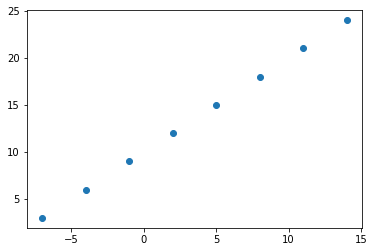

In [3]:
plt.scatter(X, y)

In [4]:
y == 1*X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Shape Analysis

In [5]:
# Demo Tensor for House Prediction Problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

But we want to use one X value to predict one y value hence out inputs won't be all of X

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

Why No Shape?
Well Cos It's a Scalar: Rank 0 Tensor

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

Hence our model takes X[0] and outputs y[0] ideally

## Turn Numpy Arrays to Tensor

In [16]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Making Model, Compiling it and fitting it on data

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 327ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


## Testing The Model

In [19]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

Poor Performance but look at the loss it has a mae of roughly 11 and hence we can't expect it to work well 

## Improving the Model

- Altering Architecture
- Change Compile Parameters
- Change fit runs or increase data

Trying 100 Epochs

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=100)

In [29]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

Trying Adam Optimizer

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])

model.fit(X, y, epochs=100)

In [34]:
model.predict([17.0])

array([[27.401554]], dtype=float32)

Trying Extra Layers

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=100)

In [42]:
model.predict([17.0])

array([[31.38265]], dtype=float32)

This model seems to be doing worse even when our loss is lower
OVERFITTING!!!

Trying to tweak hidden neurons

In [51]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=100)

1/1 [==============================] - 0s 9ms/step - loss: 3.6652 - mae: 3.6652
Epoch 99/100
1/1 [==============================] - 0s 12ms/step - loss: 3.7306 - mae: 3.7306
Epoch 100/100
1/1 [==============================] - 0s 9ms/step - loss: 3.6739 - mae: 3.6739


In [52]:
model.predict([17.0])

array([[31.323973]], dtype=float32)

Trying to tweak activation

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=100)

In [54]:
model.predict([17.0])

array([[29.787045]], dtype=float32)

Trying to tweak optimizer

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.fit(X, y, epochs=100)

In [56]:
model.predict([17.0])

array([[32.05097]], dtype=float32)

Trying to tweak optimizer's LR

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(X, y, epochs=100)

In [58]:
model.predict([17.0])

array([[27.216782]], dtype=float32)

We're Pretty Close as Our Original Relation was y = X + 10

## Visualize
- The data
- The Model
- Training 
- Predictions

Making a bigger dataset

In [62]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [64]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Visualize the Data

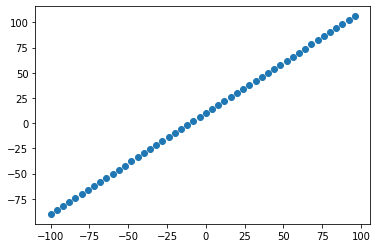

In [66]:
plt.scatter(X, y)

3 Sets
- Training
- Validation
- Testing

Here we'll make only 2 Training, Testing

In [68]:
X_train = X[:40] # 80% of 50
y_train = y[:40]
X_test = X[40:] # Last 20% of 50
y_test = y[40:]

In [70]:
X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

Visualize Training and Testing

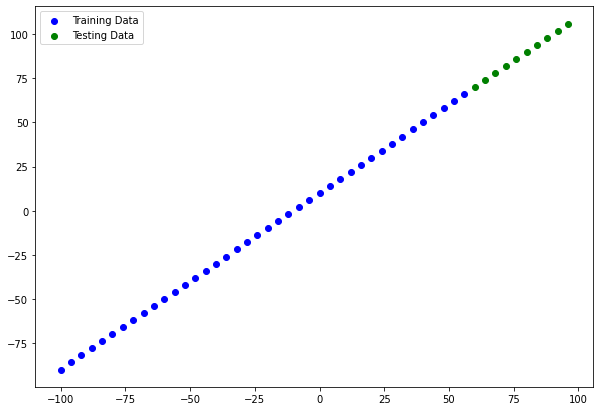

In [71]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

Model

In [94]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(1,)), # Prevents Error if you try .summary() before fitting or building
    tf.keras.layers.Dense(10, name="input_layer", input_shape=[1]),
    tf.keras.layers.Dense(1, name="output_layer"),
],     name="Model")

model.compile(loss = tf.keras.losses.mae,
              optimizer = "sgd",
              metrics=["mae"])

Visualize the Model

In [95]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


- Total Parameters: Total Parameters in Model
- Trainable ones are learnt
- Other ones aren't (Typically pop up in Transfer Learning)

In [96]:
model.fit(X_train, y_train, epochs=100, verbose=0)

Visualize Model

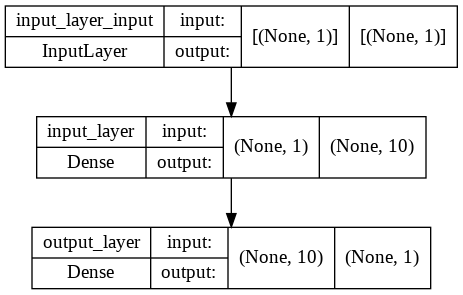

In [97]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

Visualize Model Predictions